<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 159.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 133.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 129.7 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


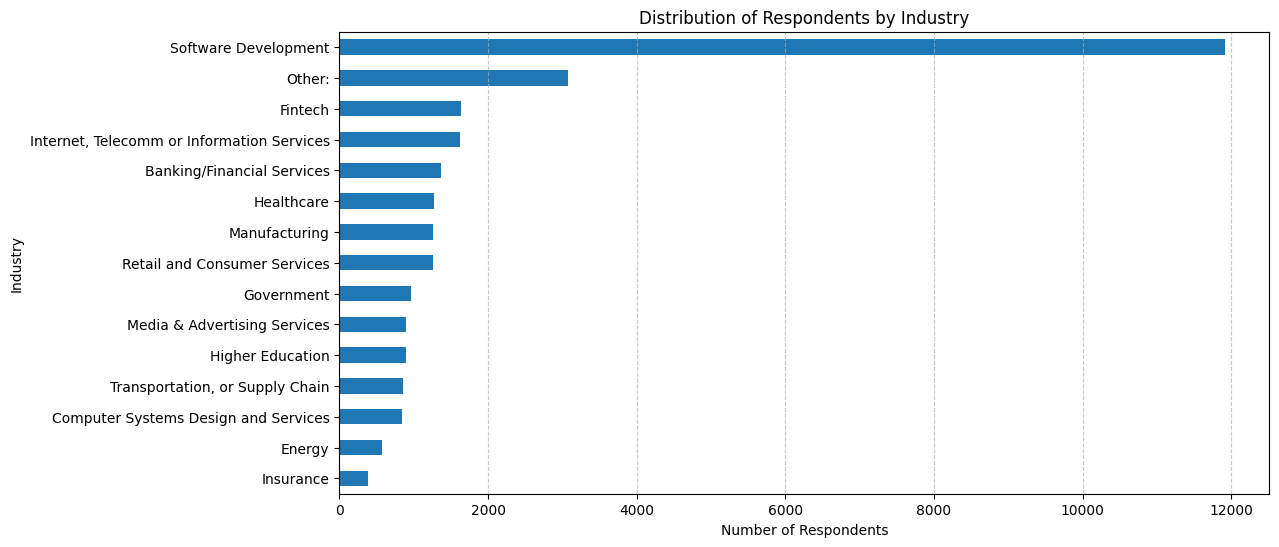

Top 5 Industries with Most Respondents:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Name: count, dtype: int64


In [3]:
# 業界ごとの回答者数を集計
industry_counts = df['Industry'].value_counts()

# 棒グラフのプロット
plt.figure(figsize=(12, 6))
industry_counts.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of Respondents")
plt.ylabel("Industry")
plt.title("Distribution of Respondents by Industry")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# プロットの表示
plt.show()

# 目立った傾向を確認
print("Top 5 Industries with Most Respondents:")
print(industry_counts.head())

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# 高額年収の回答者を特定
comp_column = 'ConvertedCompYearly'
if comp_column in df.columns:
    mean_comp = df[comp_column].mean()
    median_comp = df[comp_column].median()
    std_comp = df[comp_column].std()
    
    # しきい値（平均 + 3σ）を超える値を特定
    threshold = mean_comp + 3 * std_comp
    high_earners = df[df[comp_column] > threshold]
    
    print("\nBasic Statistics for Yearly Compensation:")
    print(f"Mean: {mean_comp:.2f}, Median: {median_comp:.2f}, Std Dev: {std_comp:.2f}")
    print(f"Threshold for High Compensation: {threshold:.2f}")
    print(f"Number of Respondents with Extremely High Compensation: {len(high_earners)}")
else:
    print("Column 'ConvertedCompYearly' not found in the dataset.")


Basic Statistics for Yearly Compensation:
Mean: 86155.29, Median: 65000.00, Std Dev: 186756.97
Threshold for High Compensation: 646426.21
Number of Respondents with Extremely High Compensation: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.



Number of Outliers using IQR: 978


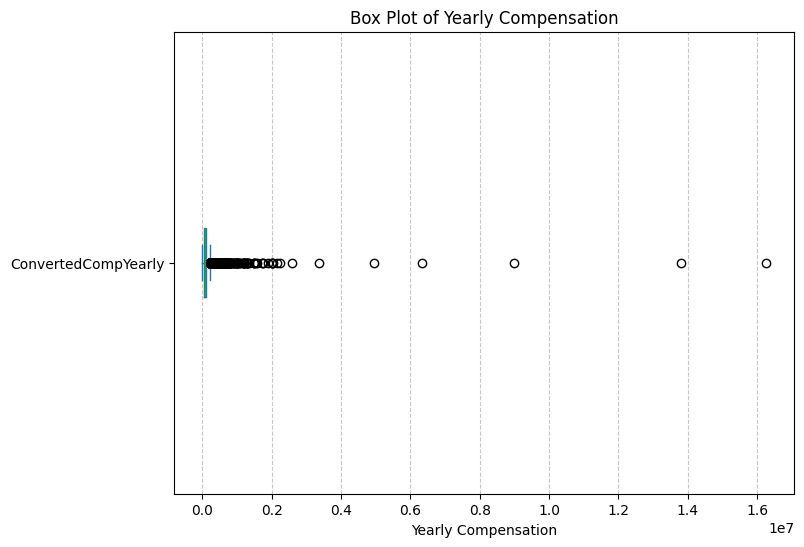

In [5]:
# IQRを使用した外れ値の特定
if comp_column in df.columns:
    Q1 = df[comp_column].quantile(0.25)
    Q3 = df[comp_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[comp_column] < lower_bound) | (df[comp_column] > upper_bound)]
    print(f"\nNumber of Outliers using IQR: {len(outliers)}")
    
    # 箱ひげ図のプロット
    plt.figure(figsize=(8, 6))
    df[comp_column].plot(kind='box', vert=False, showfliers=True)
    plt.title("Box Plot of Yearly Compensation")
    plt.xlabel("Yearly Compensation")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'ConvertedCompYearly' not found in the dataset.")

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
# 外れ値を除外した新しいデータフレームを作成
if comp_column in df.columns:
    df_cleaned = df[(df[comp_column] >= lower_bound) & (df[comp_column] <= upper_bound)]
    print(f"\nSize of original dataset: {df.shape[0]}")
    print(f"Size of cleaned dataset: {df_cleaned.shape[0]}")
else:
    print("Column 'ConvertedCompYearly' not found in the dataset.")


Size of original dataset: 65437
Size of cleaned dataset: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


/tmp/ipykernel_301/890787205.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_numeric'] = df_cleaned['Age'].dropna().apply(map_age)


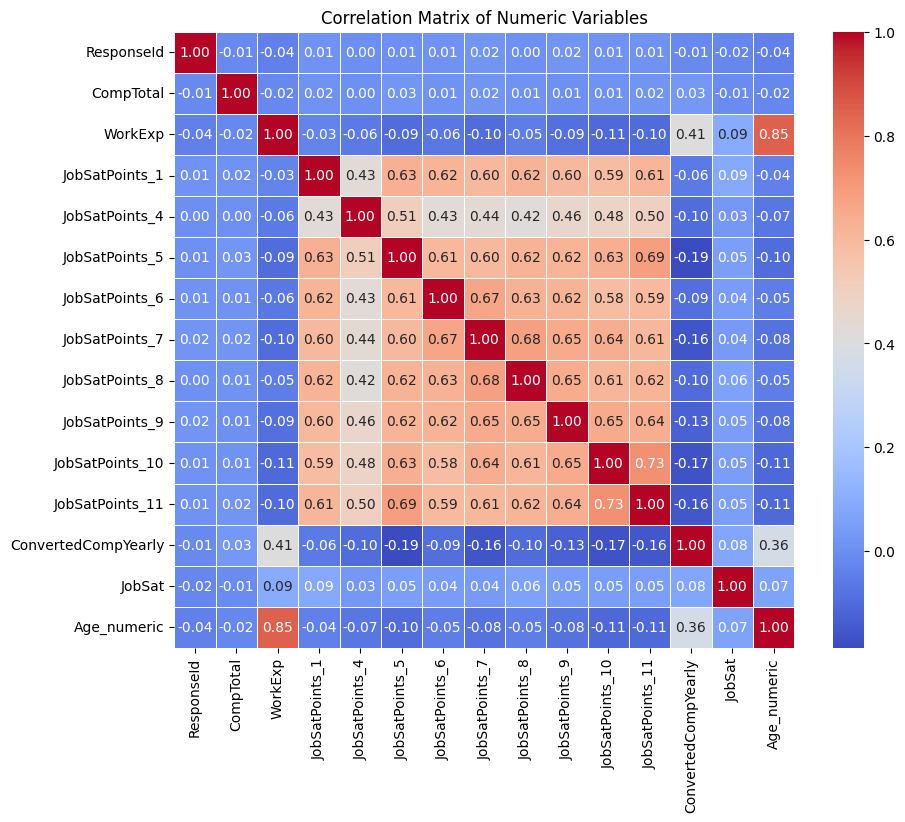

In [9]:
# 年齢を数値にマッピング
def map_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.lower()
        if "under 18" in age_str:
            return 16
        elif "65" in age_str:
            return 70
        elif "or older" in age_str:
            return 75
        elif "prefer not to say" in age_str:
            return None
        else:
            try:
                return int(age_str.split('-')[0]) + 2  # 範囲の中央値を近似値として使用
            except ValueError:
                return None
    return None

if 'Age' in df.columns:
    df_cleaned['Age_numeric'] = df_cleaned['Age'].dropna().apply(map_age)

    # 数値型変数との相関を計算
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
    correlation_matrix = df_cleaned[numeric_cols].corr()
    
    # 相関行列の可視化
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix of Numeric Variables")
    plt.show()
else:
    print("Column 'Age' not found in the dataset.")

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
